# Index:

1. About the dataset

2. Importing the standard libraries

3. Accessing the dataset

  a. Checking and replacing the null values

  b. Label Encoding

  c. Separating the target and indeependent variables

  c. Standardization

4. Dimensionality Reduction Techniques

  a. Principal Component Analysis (PCA)

  b. Linear Discriminant Analysis (LDA)

  c. Locally Linear Embedding (LLE)

  d. t-distributed Stochastic Neighbor Embedding (t-SNE)

5. Clustering

  a. Hierarchical Clustering
    
    i) Ward Linkage

    ii) Complete Linkage

    iii) Single Linkage

  b. Gaussian Mixture Model

  c. K- Means

6. Confusion Matrix

  a. Hierarchical Clustering
    
    i) Ward Linkage

    ii) Complete Linkage

    iii) Single Linkage

  b. Gaussian Mixture Model

  c. K- Means

7. Business Inference

## 1. About the dataset

id----------id of the patient, numerical

age----------age in years, numerical

bp----------Blood Pressure in mm/Hg, numerical

sg----------Specific Gravity (1.005,1.010,1.015,1.020,1.025), nominal

al----------Albumin (0,1,2,3,4,5), nominal

su----------Sugar (0,1,2,3,4,5), nominal

rbc----------Red Blood Cells (normal,abnormal), nominal

pc----------Pus Cell (normal,abnormal), nominal

pcc----------Pus Cell clumps (present,notpresent), nominal 

ba----------Bacteria (present,notpresent), nominal

bge----------Blood Glucose Random in mgs/dl, numerical

bu----------Blood Urea in mgs/dl, numerical

sc----------Serum Creatinine in mgs/dl, numerical

sod----------Sodium in mEq/L, numerical

pot----------Potassium in mEq/L, numerical 

hemo----------Hemoglobin in gms, numerical

pcv----------Packed Cell Volume, numerical

wc----------White Blood Cell Count in cells/cuumm, numerical

rc----------Red Blood Cell Count in millions/cmm, numerical

htn----------Hypertension (yes,no), nominal

dm----------Diabetes Mellitus (yes,no), nominal

cad----------Coronary Artery Disease (yes,no), nominal

appet----------Appetite (good,poor), nominal

pe----------Pedal Edema (yes,no), nominal

ane----------Anemia (yes,no), nominal

classification----------(ckd,notckd)-> (chronic kidney disease, not chronic kidney disease), nominal

shape->400 rows 26 columns
## 2. Importing the standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Accessing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/Group 7 Assignments/Trim 3/AMLT/

/content/drive/MyDrive/Group 7 Assignments/Trim 3/AMLT


In [4]:
import pandas as pd
df= pd.read_csv('kidney_disease.csv')
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
NumericalColumns = ['age','bp','al','su','bgr','bu','sc','sod','pot','hemo']
CategoricalColumns = ['rbc','sg','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']

## 3. a. Checking & replacing null values

In [6]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
df['classification'].replace("ckd\t","ckd",inplace=True)

df['dm'].replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)

df['cad'].replace(["\tno"],["no"],inplace=True)

In [8]:
df['rc'].replace("\t?",np.nan, inplace=True)

df.wc.replace("\t?",np.nan, inplace=True)

df['pcv'].replace(["\t?","\t43"],np.nan, inplace=True)

In [9]:
for columnName in CategoricalColumns:
  df[columnName].fillna(df[columnName].mode()[0], inplace=True)

In [10]:
for columnName in NumericalColumns:
  df[columnName].fillna(df[columnName].mean(), inplace=True)

In [11]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [12]:
df['classification'].replace(["ckd","notckd"],[1,0], inplace=True)

In [13]:
df.classification.value_counts()

1    250
0    150
Name: classification, dtype: int64

## 3. b. Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for col in CategoricalColumns:
    df[col]=le.fit_transform(df[col])

## 3. c. Separating the target and independent variables

In [15]:
x=df.drop(['classification'],axis=1)
y=df['classification']

## 3. c. Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.72772608, -0.20546364,  0.26233836, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-1.7190658 , -2.62380991, -1.96658024, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-1.71040552,  0.62031314,  0.26233836, ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [ 1.71040552, -2.32888964,  0.26233836, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 1.7190658 , -2.03396936, -1.22360737, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 1.72772608,  0.38437691,  0.26233836, ..., -0.50780078,
        -0.4843221 , -0.42008403]])

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=100)

# 4. Dimensionality Reduction Techniques
## 4. a. Principal Component Analysis (PCA)

In [18]:
cm= np.cov(x_scaled.T)
cm

array([[ 1.00250627e+00, -1.84504267e-01, -2.44342896e-01,
         5.83963416e-01, -5.21343669e-01, -2.72009930e-01,
         2.32036738e-01,  3.36666858e-01, -2.64803992e-01,
        -1.16245864e-01, -3.20738551e-01, -3.01696983e-01,
        -2.65358798e-01,  3.23873608e-01, -8.17284441e-02,
         6.11030260e-01,  5.67605135e-01, -1.05923790e-01,
         3.98478819e-01, -5.21392726e-01, -4.76296783e-01,
        -2.06090069e-01, -3.75332556e-01, -3.08892534e-01,
        -2.73780418e-01],
       [-1.84504267e-01,  1.00250627e+00,  1.48375048e-01,
        -1.59471384e-01,  1.15051600e-01,  2.08377629e-01,
        -1.18127179e-02, -1.02206951e-01,  1.59473090e-01,
         4.36820989e-02,  2.14947449e-01,  1.88014395e-01,
         1.27635123e-01, -8.61642521e-02,  5.02741664e-02,
        -1.75819525e-01, -2.08404544e-01,  2.17236557e-02,
        -2.11067735e-01,  3.94425996e-01,  3.64386383e-01,
         2.33534974e-01,  1.58135978e-01,  9.46704041e-02,
         5.06940295e-02],
    

In [19]:
eig_val, eig_vec= np.linalg.eig(cm)
eig_val

array([7.37581749, 1.84414815, 1.70393113, 1.31589049, 1.23252831,
       1.16322453, 1.07141258, 0.9687671 , 0.92418658, 0.82523864,
       0.7854362 , 0.80731063, 0.67932562, 0.59639871, 0.17395291,
       0.52558426, 0.22071191, 0.45307518, 0.44241317, 0.26330058,
       0.2864188 , 0.394359  , 0.3189085 , 0.33808215, 0.35223403])

In [20]:
eig_vec

array([[ 2.63105228e-01, -7.62088981e-02, -3.54841024e-03,
        -2.10584299e-01,  5.77658454e-02,  1.74437296e-01,
        -1.78546892e-01, -1.50278778e-01, -2.72520092e-02,
         3.11328095e-01,  1.19660733e-01, -1.37121424e-02,
         1.81133373e-01,  2.56686683e-02, -7.19272223e-02,
         1.35402208e-01, -3.39858027e-02,  1.65189186e-01,
        -2.53862324e-01,  3.66999936e-01,  2.17390358e-01,
         6.12922536e-02, -5.68449269e-01, -1.27915704e-01,
        -7.17054017e-02],
       [-1.24679230e-01,  2.72450291e-01,  1.44086390e-01,
        -2.93169147e-02,  1.93718048e-01,  2.73735843e-01,
        -2.98448018e-01,  5.62304700e-02, -3.22221327e-01,
        -3.61494000e-01,  3.50490486e-01,  2.16345982e-01,
         3.09453264e-01, -1.18221512e-01, -5.01640157e-02,
         1.99949819e-01, -5.71069870e-03,  1.47038543e-01,
         2.25573096e-01, -1.55322588e-02, -1.78860851e-01,
        -5.00541392e-02, -2.74905432e-02, -2.68869358e-04,
         1.39631557e-01],
    

In [21]:
sorted_eig_val= [i for i in sorted(eig_val, reverse= True)]
sorted_eig_val

[7.375817492673898,
 1.844148152402297,
 1.703931125772596,
 1.3158904851854993,
 1.232528314917531,
 1.1632245293543997,
 1.0714125812590887,
 0.9687671034589787,
 0.9241865753269971,
 0.8252386389487092,
 0.8073106261141009,
 0.785436200550915,
 0.6793256238015529,
 0.5963987120048017,
 0.5255842621969166,
 0.4530751755687689,
 0.44241317182233303,
 0.39435900174650956,
 0.35223402891633565,
 0.3380821459205617,
 0.318908501153822,
 0.28641879657263614,
 0.2633005788674765,
 0.22071190544287642,
 0.17395291162441115]

In [22]:
tot= sum(eig_val)
tot

25.06265664160401

In [23]:
exp_var= [(i/tot) for i in sorted_eig_val]
exp_var

[0.2942951179576885,
 0.07358151128085164,
 0.06798685191832658,
 0.05250403035890142,
 0.04917787976520949,
 0.04641265872124054,
 0.04274936199223764,
 0.03865380742801325,
 0.036875044355547185,
 0.032927021694053496,
 0.03221169398195262,
 0.031338904401981504,
 0.02710509238968196,
 0.023796308608991585,
 0.02097081206165697,
 0.01807769950519388,
 0.01765228555571109,
 0.01573492416968573,
 0.014054137753761792,
 0.013489477622230411,
 0.012724449196037498,
 0.011428109983248181,
 0.010505693096812312,
 0.008806405027170769,
 0.006940721173814004]

In [24]:
len(exp_var)

25

In [25]:
cum_exp_var= np.cumsum(exp_var)
cum_exp_var

array([0.29429512, 0.36787663, 0.43586348, 0.48836751, 0.53754539,
       0.58395805, 0.62670741, 0.66536122, 0.70223626, 0.73516329,
       0.76737498, 0.79871388, 0.82581898, 0.84961528, 0.8705861 ,
       0.8886638 , 0.90631608, 0.92205101, 0.93610514, 0.94959462,
       0.96231907, 0.97374718, 0.98425287, 0.99305928, 1.        ])

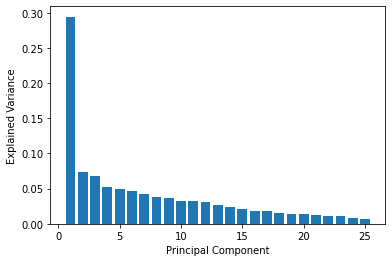

In [26]:
plt.bar(range(1, 26), exp_var, label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance');

In [27]:
eig_pair=[(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pair

[(7.375817492673898,
  array([ 0.26310523, -0.12467923, -0.12964184,  0.2258185 , -0.26751203,
         -0.15244227,  0.13971405,  0.21883455, -0.15673273, -0.11527291,
         -0.17506534, -0.23366605, -0.17174517,  0.16988195, -0.0628676 ,
          0.30473197,  0.29184272,  0.01481237,  0.25255215, -0.2691683 ,
         -0.23898768, -0.15069297, -0.18926533, -0.18822535, -0.18506639])),
 (1.844148152402297,
  array([-0.0762089 ,  0.27245029,  0.06414846, -0.06736173, -0.04170049,
          0.48423585,  0.12374674,  0.12195753, -0.00895486, -0.08682859,
          0.46106132, -0.244959  , -0.22139882,  0.15048508, -0.04296176,
          0.12836421,  0.11192454,  0.16411445,  0.13658892,  0.14287698,
          0.33474581,  0.13091089, -0.053598  , -0.09519286, -0.23463639])),
 (1.703931125772596,
  array([-0.00354841,  0.14408639,  0.08047565,  0.18230178, -0.2436202 ,
          0.00167253,  0.23999681,  0.36686434, -0.3767482 , -0.39337639,
         -0.05828066,  0.21521973,  0.38907

In [28]:
# Taking only first two

w= np.hstack((eig_pair[0][1][:,np.newaxis],
            eig_pair[1][1][:,np.newaxis]))
w, w.shape

(array([[ 0.26310523, -0.0762089 ],
        [-0.12467923,  0.27245029],
        [-0.12964184,  0.06414846],
        [ 0.2258185 , -0.06736173],
        [-0.26751203, -0.04170049],
        [-0.15244227,  0.48423585],
        [ 0.13971405,  0.12374674],
        [ 0.21883455,  0.12195753],
        [-0.15673273, -0.00895486],
        [-0.11527291, -0.08682859],
        [-0.17506534,  0.46106132],
        [-0.23366605, -0.244959  ],
        [-0.17174517, -0.22139882],
        [ 0.16988195,  0.15048508],
        [-0.0628676 , -0.04296176],
        [ 0.30473197,  0.12836421],
        [ 0.29184272,  0.11192454],
        [ 0.01481237,  0.16411445],
        [ 0.25255215,  0.13658892],
        [-0.2691683 ,  0.14287698],
        [-0.23898768,  0.33474581],
        [-0.15069297,  0.13091089],
        [-0.18926533, -0.053598  ],
        [-0.18822535, -0.09519286],
        [-0.18506639, -0.23463639]]), (25, 2))

In [29]:
new_x= x_scaled.dot(w)
new_x

array([[ 3.90777476e-01,  1.08246902e+00],
       [ 7.62183249e-01, -9.20802145e-01],
       [-3.13715812e+00,  3.01349007e+00],
       [-4.71650214e+00, -2.22921557e+00],
       [-5.29630205e-02, -2.63452052e-01],
       [-1.39365443e+00,  5.85283641e-01],
       [-7.46132485e-01, -1.29602451e+00],
       [-1.94632459e+00,  3.31793235e+00],
       [-3.46011277e+00, -2.69741638e-01],
       [-4.92905661e+00, -2.67572929e+00],
       [-4.49884183e+00,  3.66537229e+00],
       [-5.16142853e+00,  7.56969095e-01],
       [-4.61528020e+00,  1.09334497e+00],
       [-2.22425596e+00,  9.06465862e-01],
       [-7.45638853e+00, -1.87559837e-01],
       [-3.19490831e+00, -2.84214916e+00],
       [ 7.54988695e-01, -2.40072947e-01],
       [-3.68296626e-01, -7.83002899e-02],
       [-1.60542733e+00,  3.36981388e+00],
       [-2.27804646e+00, -2.55190845e-01],
       [-6.04566403e+00, -1.23383613e+00],
       [-7.28319939e+00, -4.41999416e+00],
       [-2.91094649e+00, -2.59751374e+00],
       [-3.

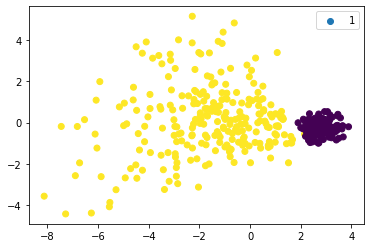

In [30]:
plt.scatter(new_x[:,0], new_x[:,1] ,c=y)
plt.legend(y);

In [31]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
x_pca= pca.fit_transform(x_scaled)

In [32]:
pca.components_.T[:,1]

array([-0.0762089 ,  0.27245029,  0.06414846, -0.06736173, -0.04170049,
        0.48423585,  0.12374674,  0.12195753, -0.00895486, -0.08682859,
        0.46106132, -0.244959  , -0.22139882,  0.15048508, -0.04296176,
        0.12836421,  0.11192454,  0.16411445,  0.13658892,  0.14287698,
        0.33474581,  0.13091089, -0.053598  , -0.09519286, -0.23463639])

In [33]:
pca.explained_variance_ratio_

array([0.29429512, 0.07358151])

In [34]:
xdf1 = pd.DataFrame({'x0':x_pca[:,0],
                      'X1':x_pca[:,1],
                      'Label':y})
xdf1

x0        X1  Label
0   -0.390777  1.082469      1
1   -0.762183 -0.920802      1
2    3.137158  3.013490      1
3    4.716502 -2.229216      1
4    0.052963 -0.263452      1
..        ...       ...    ...
395 -2.680418  0.183328      0
396 -3.888879 -0.202862      0
397 -3.216405 -0.736823      0
398 -3.405799 -0.843039      0
399 -3.468709  0.398938      0

[400 rows x 3 columns]

<Figure size 1080x864 with 0 Axes>

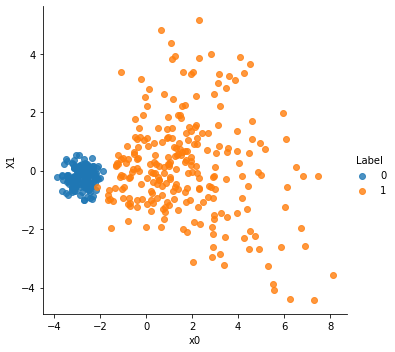

In [35]:
plt.figure(figsize=(15,12))
sns.lmplot(data=xdf1, x='x0',y='X1',hue='Label',fit_reg=False);

## 4. b. Linear Discriminant Analysis (LDA)

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1) # n_components= min(n_classes-1, features)

In [37]:
type(lda)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [38]:
x_lda= lda.fit_transform(x_scaled, y)
x_lda.shape

(400, 1)

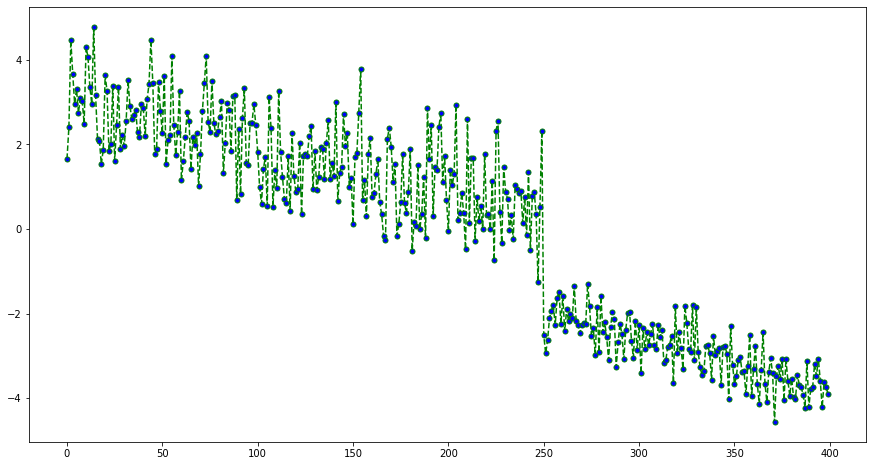

In [39]:
plt.figure(figsize=(15,8))
plt.plot(x_lda[:,0],color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5);

## 4. c. Locally Linear Embedding (LLE)

In [40]:
from sklearn.manifold import LocallyLinearEmbedding
lle= LocallyLinearEmbedding(n_neighbors=10, n_components=2)

In [41]:
x_lle=lle.fit_transform(x_scaled)
x_lle

array([[-4.28778620e-03, -6.81241359e-02],
       [ 1.40410208e-02, -7.90417883e-02],
       [-9.15929649e-02,  3.16137530e-02],
       [-5.02788200e-02, -4.86955644e-03],
       [ 1.33546868e-02, -4.68397984e-02],
       [-1.96969407e-02, -3.87686742e-03],
       [ 3.06230283e-02, -8.57294868e-02],
       [-8.19712635e-02,  6.94826065e-02],
       [-3.20557649e-02, -3.11054660e-03],
       [-4.26583952e-02, -1.16154457e-02],
       [-7.75281367e-02,  1.59142076e-02],
       [-4.54359435e-02,  1.63278132e-02],
       [-1.63706747e-02,  1.92497979e-02],
       [-3.85433204e-02, -1.46438878e-02],
       [-1.37108078e-02,  3.54635973e-02],
       [-8.95214892e-02, -1.89692471e-02],
       [ 9.55990329e-03, -7.90935785e-02],
       [-2.06729968e-02,  8.74916765e-03],
       [-7.21749303e-02, -1.38450299e-03],
       [ 2.34651273e-02,  9.69812237e-03],
       [-4.35973572e-02, -1.46410098e-02],
       [ 5.73182922e-02, -6.55719954e-02],
       [-1.61892108e-01, -3.21655117e-02],
       [-1.

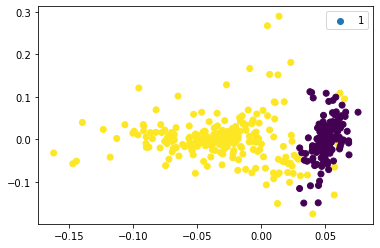

In [42]:
plt.scatter(x_lle[:,0],x_lle[:,1], c=y)
plt.legend(y);

In [43]:
xdf2 = pd.DataFrame({'x0':x_lle[:,0],
                      'X1':x_lle[:,1],
                      'Label':y})
xdf2

x0        X1  Label
0   -0.004288 -0.068124      1
1    0.014041 -0.079042      1
2   -0.091593  0.031614      1
3   -0.050279 -0.004870      1
4    0.013355 -0.046840      1
..        ...       ...    ...
395  0.044665 -0.108617      0
396  0.048442  0.033657      0
397  0.039985 -0.020091      0
398  0.044218  0.001418      0
399  0.059151  0.042799      0

[400 rows x 3 columns]

<Figure size 1080x864 with 0 Axes>

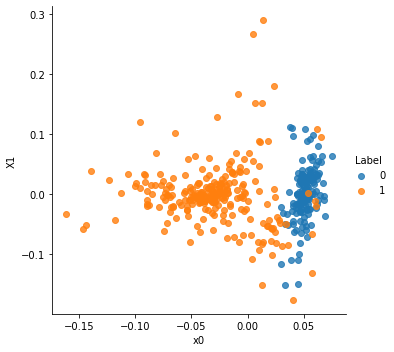

In [44]:
plt.figure(figsize=(15,12))
sns.lmplot(data=xdf2, x='x0',y='X1',hue='Label',fit_reg=False);

## 4. d. t-distributed Stochastic Neighbor Embedding (t-SNE)

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30)
xt = tsne.fit_transform(x_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


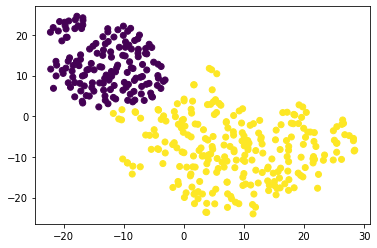

In [46]:
plt.scatter(xt[:,0], xt[:,1],c=y.astype(float));

In [47]:
xdf3 = pd.DataFrame({'x0':xt[:,0],
                      'X1':xt[:,1],
                      'Label':y})
xdf3

x0         X1  Label
0     3.077988  -9.803547      1
1    -1.065520   3.085015      1
2    12.641500  -1.014012      1
3    21.733189  -4.024543      1
4    -0.274559  -1.003509      1
..         ...        ...    ...
395  -9.747202  14.835625      0
396 -17.850492  13.538126      0
397 -15.799067  11.590346      0
398 -18.846855   7.132336      0
399 -15.667743  16.541143      0

[400 rows x 3 columns]

<Figure size 1080x864 with 0 Axes>

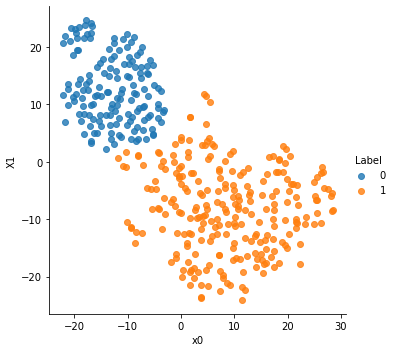

In [48]:
plt.figure(figsize=(15,12))
sns.lmplot(data=xdf3, x='x0',y='X1',hue='Label',fit_reg=False);

# 5. Clustering
## 5. a. Hierarchical Clustering
### a. i) Ward Linkage

>  Divisive Clustering



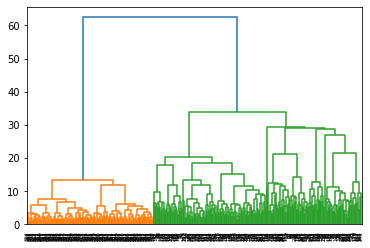

In [49]:
import scipy.cluster.hierarchy as sch

dendro= sch.dendrogram(sch.linkage(x_scaled, method='ward')) # ward-> minimizes variance in the cluster

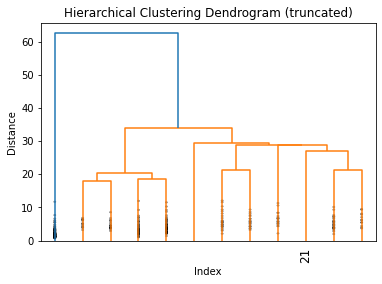

In [50]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    sch.linkage(x_scaled, method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()



> Agglomerative Clustering



In [51]:
from sklearn.cluster import AgglomerativeClustering

clust= AgglomerativeClustering(n_clusters=2, linkage='ward')

type(clust)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [52]:
clust.fit_predict(x)

label_ward= pd.Series(clust.labels_)
label_ward

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Length: 400, dtype: int64

In [53]:
label_default= pd.Series(y)
label_default

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

### a. ii) Complete Linkage

>  Divisive Clustering


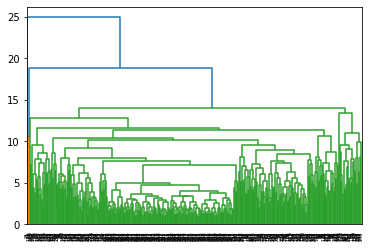

In [54]:
dendro2= sch.dendrogram(sch.linkage(x_scaled, method='complete'))

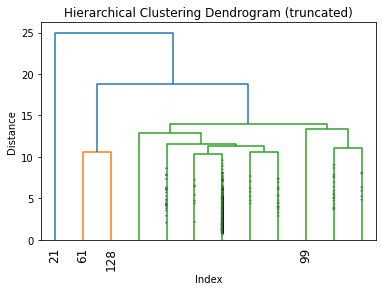

In [55]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    sch.linkage(x_scaled, method='complete'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()



> Agglomerative Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

clust2= AgglomerativeClustering(n_clusters=2, linkage='complete')

type(clust2)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [57]:
clust2.fit_predict(x)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
label_complete= pd.Series(clust2.labels_)
label_complete

0      1
1      1
2      0
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Length: 400, dtype: int64

### a. iii) Single Linkage

>  Divisive Clustering


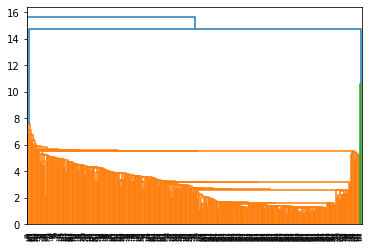

In [59]:
dendro2= sch.dendrogram(sch.linkage(x_scaled, method='single'))

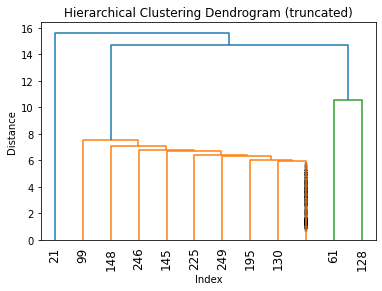

In [60]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    sch.linkage(x_scaled, method='single'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

> Agglomerative Clustering

In [61]:
clust3= AgglomerativeClustering(n_clusters=2, linkage='single')

type(clust3)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [62]:
clust3.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
label_single= pd.Series(clust3.labels_)
label_single

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [64]:
data={'Label_default':y, 'Label_ward':label_ward, 'Label_single':label_single, 'Label_complete':label_complete}
labels= pd.DataFrame(data)
labels

Label_default  Label_ward  Label_single  Label_complete
0                1           0             0               1
1                1           0             0               1
2                1           0             0               0
3                1           0             0               1
4                1           0             0               1
..             ...         ...           ...             ...
395              0           1             0               1
396              0           1             0               1
397              0           1             0               1
398              0           1             0               1
399              0           1             0               1

[400 rows x 4 columns]

## 5. b. Gaussian Mixture Model

In [65]:
from sklearn.mixture import GaussianMixture
gmm= GaussianMixture(n_components= 2, n_init= 10) # n_components -> n_clusters
# Training 
gmm.fit(x_scaled)

GaussianMixture(n_components=2, n_init=10)

In [66]:
# Predict the cluster level
pred= gmm.predict(x_scaled)
label_gmm=pred
pred, pred.shape

(array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [67]:
np.unique(pred)

array([0, 1])

In [68]:
# mean
gmm.means_

array([[ 0.38095088, -0.15939767, -0.20834028,  0.31712185, -0.41796374,
        -0.20508741,  0.36488968,  0.3847493 , -0.34251779, -0.24124895,
        -0.22769863, -0.33708748, -0.28676805,  0.22904366, -0.09871078,
         0.4740371 ,  0.44030231,  0.01433111,  0.32037574, -0.33283695,
        -0.2525441 , -0.30478874, -0.26589873, -0.2353901 , -0.42008403],
       [-0.67724601,  0.28337363,  0.37038272, -0.56377218,  0.74304664,
         0.36459984, -0.64869276, -0.68399876,  0.60892051,  0.42888703,
         0.40479757,  0.59926663,  0.50980986, -0.40718873,  0.17548583,
        -0.84273263, -0.78275966, -0.02547753, -0.56955688,  0.59171013,
         0.44896729,  0.54184665,  0.47270886,  0.41847129,  0.74681604]])

In [69]:
gmm.covariances_

array([[[ 9.31832595e-01, -9.87865899e-02, -1.72455357e-01, ...,
         -2.53253666e-01, -2.67684603e-01, -1.23259516e-32],
        [-9.87865899e-02,  1.09739647e+00,  1.21462540e-01, ...,
          9.30061156e-02,  3.08198002e-02, -1.07852077e-32],
        [-1.72455357e-01,  1.21462540e-01,  6.41239404e-01, ...,
          5.38071894e-02, -1.64353650e-02, -1.35585468e-31],
        ...,
        [-2.53253666e-01,  9.30061156e-02,  5.38071894e-02, ...,
          5.40694400e-01,  3.09757080e-01, -2.15704154e-32],
        [-2.67684603e-01,  3.08198002e-02, -1.64353650e-02, ...,
          3.09757080e-01,  5.72577393e-01, -1.84889275e-32],
        [ 2.46519033e-32, -4.62223187e-33, -8.78224055e-32, ...,
         -1.23259516e-32,  3.08148791e-32,  1.00000000e-06]],

       [[ 4.04529653e-01, -3.57448721e-02,  2.14916984e-02, ...,
         -8.95361731e-02,  6.28190306e-02,  3.16785079e-02],
        [-3.57448721e-02,  7.01383792e-01,  3.11942877e-02, ...,
          6.35223182e-02,  2.22380770e

In [70]:
np.bincount(pred)

array([256, 144])

In [71]:
gmm.weights_

array([0.64, 0.36])

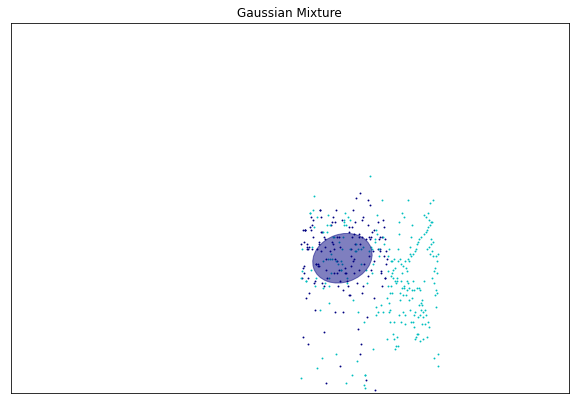

In [72]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c"])


def plot_results(X, Y_, means, covariances, index, title):
    plt.figure(figsize=(10,15))
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    
    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

# Fit a Gaussian mixture with EM using two components
gmm = mixture.GaussianMixture(n_components=2, covariance_type="full").fit(x_scaled)
plot_results(x_scaled, gmm.predict(x_scaled), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

plt.show();

### Finding the best GMM components

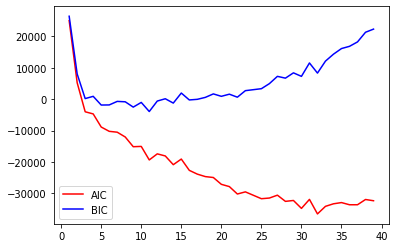

In [73]:
import numpy as np
n_components= np.arange(1,40,1)
aic_scores=[]
bic_scores=[]

for n in n_components:
    model= GaussianMixture(n, n_init= 10)
    model.fit(x_scaled)
    
    aic_value=model.aic(x_scaled)
    aic_scores.append(aic_value)
    
    bic_value=model.bic(x_scaled)
    bic_scores.append(bic_value)
    
plt.plot(n_components, aic_scores, label='AIC', c='red')
plt.plot(n_components, bic_scores, label='BIC', c='blue')
plt.legend();

In [74]:
gmm_data= GaussianMixture(n_components=5, n_init=10)
gmm_data.fit(x)

GaussianMixture(n_components=5, n_init=10)

In [75]:
data_pred=gmm_data.predict(x)
label_gmm_5= data_pred
data_pred

array([4, 4, 0, 3, 4, 4, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 4, 4, 1, 3, 3, 3,
       3, 4, 3, 3, 4, 1, 3, 3, 4, 3, 3, 4, 3, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 4, 1, 3, 4, 3, 3, 1, 4, 3, 3, 4, 4, 2, 4,
       4, 0, 4, 1, 0, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 0, 4, 4, 3, 4, 0, 3,
       1, 4, 1, 1, 1, 1, 4, 4, 3, 4, 3, 1, 4, 3, 2, 1, 4, 4, 4, 1, 4, 1,
       2, 1, 4, 3, 4, 4, 4, 2, 4, 2, 1, 4, 4, 3, 4, 1, 4, 3, 1, 4, 3, 2,
       1, 3, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 3, 1, 1, 4, 4, 4, 4, 4, 1,
       1, 4, 3, 4, 0, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1, 0, 4, 1, 4, 4, 1,
       4, 1, 4, 4, 1, 4, 2, 4, 1, 4, 4, 4, 2, 1, 4, 4, 2, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 2, 1, 1, 4, 4, 2, 4, 2, 4,
       2, 1, 4, 1, 4, 0, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [76]:
gmm_data.means_

array([[1.06076923e+02, 5.58461538e+01, 7.66514671e+01, 1.92307692e+00,
        2.00260756e+00, 2.53079115e+00, 7.69230769e-01, 5.38461538e-01,
        3.07692308e-01, 7.69230769e-02, 4.23923077e+02, 5.08019786e+01,
        2.15941956e+00, 1.34664905e+02, 4.34124753e+00, 1.15732980e+01,
        2.18461538e+01, 6.53846154e+01, 2.74615385e+01, 6.92307692e-01,
        9.23076923e-01, 1.53846154e-01, 2.30769231e-01, 1.53846154e-01,
        2.30769231e-01],
       [1.45975635e+02, 6.01558512e+01, 8.25155071e+01, 1.87936381e+00,
        1.88709003e+00, 1.87040150e+00, 7.64053101e-01, 6.46119760e-01,
        1.96567800e-01, 1.18002868e-01, 2.53584599e+02, 8.05302585e+01,
        4.64827392e+00, 1.34370817e+02, 5.22214410e+00, 1.10824174e+01,
        2.05894526e+01, 6.18286200e+01, 2.37798964e+01, 7.05343233e-01,
        8.42738658e-01, 2.35888041e-01, 2.94862939e-01, 2.94924269e-01,
        2.36077160e-01],
       [3.10695122e+02, 4.60668704e+01, 7.21305318e+01, 3.32926829e+00,
        3.7205

In [77]:
gmm_data.covariances_

array([[[ 7.91299408e+03,  4.92704142e+02,  1.87916184e+02, ...,
         -1.83254438e+01, -1.49349112e+01, -4.78698225e+00],
        [ 4.92704142e+02,  1.40437871e+02, -2.02851827e+01, ...,
          1.89349112e-01, -1.89940828e+00,  6.50887574e-01],
        [ 1.87916184e+02, -2.02851827e+01,  9.74386708e+01, ...,
          3.50759471e-03, -5.25681693e-01,  3.50759471e-03],
        ...,
        [-1.83254438e+01,  1.89349112e-01,  3.50759471e-03, ...,
          1.77515793e-01,  4.14201183e-02,  2.36686391e-02],
        [-1.49349112e+01, -1.89940828e+00, -5.25681693e-01, ...,
          4.14201183e-02,  1.30178515e-01, -3.55029586e-02],
        [-4.78698225e+00,  6.50887574e-01,  3.50759471e-03, ...,
          2.36686391e-02, -3.55029586e-02,  1.77515793e-01]],

       [[ 3.29944763e+03,  1.56713467e+01, -1.88663068e+02, ...,
         -1.64389185e+00,  7.90596783e+00,  3.28841354e+00],
        [ 1.56713467e+01,  9.21156997e+01,  1.45201037e+01, ...,
          1.30981976e-01, -3.21798201e

In [78]:
gmm_data.weights_

array([0.0325    , 0.12717897, 0.41      , 0.10739638, 0.32292465])

In [79]:
label_gmm= data_pred
label_gmm

array([4, 4, 0, 3, 4, 4, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 4, 4, 1, 3, 3, 3,
       3, 4, 3, 3, 4, 1, 3, 3, 4, 3, 3, 4, 3, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 4, 1, 3, 4, 3, 3, 1, 4, 3, 3, 4, 4, 2, 4,
       4, 0, 4, 1, 0, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 0, 4, 4, 3, 4, 0, 3,
       1, 4, 1, 1, 1, 1, 4, 4, 3, 4, 3, 1, 4, 3, 2, 1, 4, 4, 4, 1, 4, 1,
       2, 1, 4, 3, 4, 4, 4, 2, 4, 2, 1, 4, 4, 3, 4, 1, 4, 3, 1, 4, 3, 2,
       1, 3, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 3, 1, 1, 4, 4, 4, 4, 4, 1,
       1, 4, 3, 4, 0, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 1, 0, 4, 1, 4, 4, 1,
       4, 1, 4, 4, 1, 4, 2, 4, 1, 4, 4, 4, 2, 1, 4, 4, 2, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 2, 1, 1, 4, 4, 2, 4, 2, 4,
       2, 1, 4, 1, 4, 0, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

<ipython-input-80-34cb0c3d408b>:28: RuntimeWarning: invalid value encountered in double_scalars
  angle = np.arctan(u[1] / u[0])


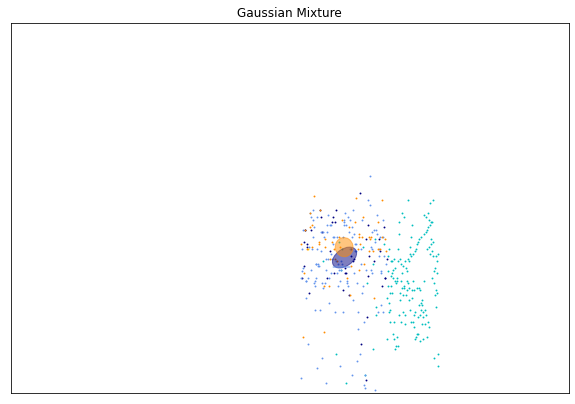

In [80]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    plt.figure(figsize=(10,15))
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    
    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type="full").fit(x_scaled)
plot_results(x_scaled, gmm.predict(x_scaled), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

plt.show();

In [81]:
data={'Label_default':y, 'Label_ward':label_ward, 'Label_single':label_single, 'Label_complete':label_complete,'Label_gmm':pred ,'Label_gmm_5':label_gmm}
labels= pd.DataFrame(data)
labels

Label_default  Label_ward  Label_single  Label_complete  Label_gmm  \
0                1           0             0               1          0   
1                1           0             0               1          0   
2                1           0             0               0          1   
3                1           0             0               1          1   
4                1           0             0               1          0   
..             ...         ...           ...             ...        ...   
395              0           1             0               1          0   
396              0           1             0               1          0   
397              0           1             0               1          0   
398              0           1             0               1          0   
399              0           1             0               1          0   

     Label_gmm_5  
0              4  
1              4  
2              0  
3              3  
4              4  
..           ...  
395            2  
396            2  
397            2  
398            2  
399            2  

[400 rows x 6 columns]

## 5. c. KMeans

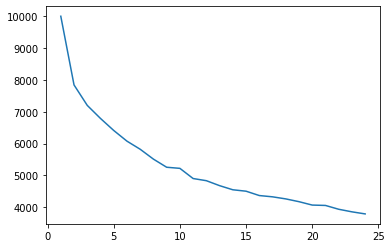

In [82]:
from sklearn.cluster import KMeans
SSD=[] # Sum of Squares of Distance

for k in range (1,25):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x_scaled)
    SSD.append(kmeans.inertia_)
    
plt.plot(range(1,25),SSD);

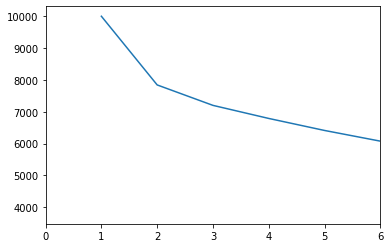

In [83]:
SSD=[] # Sum of Squares of Distance

for k in range (1,25):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x_scaled)
    SSD.append(kmeans.inertia_)
    
plt.plot(range(1,25),SSD);
plt.xlim([0,6]);

> Silhouette Method

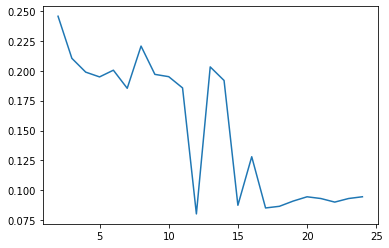

In [84]:
# Silhouette score

from sklearn.metrics import silhouette_score

SS=[]

for k in range(2,25):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x_scaled)
    SS.append(silhouette_score(x_scaled, kmeans.predict(x_scaled)))
    
plt.plot(range(2,25),SS);

### Implementing the model using k= 2

In [85]:
k_best= KMeans(n_clusters= 2, random_state=10)
k_best= k_best.fit(x_scaled)

In [86]:
label_kmeans= k_best.predict(x_scaled)
clusters= k_best.predict(x_scaled)
print('the cluster labels are:\n',clusters)

the cluster labels are:
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1
 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [87]:
np.unique(clusters)

array([0, 1], dtype=int32)

In [88]:
# The cluster centeroids

k_best.cluster_centers_

array([[ 0.67643588, -0.40266505, -0.30282302,  0.51180717, -0.60662473,
        -0.3548339 ,  0.30399862,  0.44683587, -0.34251779, -0.21974727,
        -0.43682752, -0.46158695, -0.32249896,  0.34236995, -0.1024965 ,
         0.70023642,  0.66072718, -0.01651998,  0.52396719, -0.69107975,
        -0.61844477, -0.30478874, -0.41066051, -0.39685423, -0.37889932],
       [-0.70404551,  0.41910035,  0.31518314, -0.53269726,  0.63138492,
         0.36931691, -0.31640672, -0.46507407,  0.35649811,  0.22871654,
         0.45465721,  0.48042724,  0.33566218, -0.35634423,  0.10668003,
        -0.7288175 , -0.68769564,  0.01719427, -0.54535361,  0.71928708,
         0.64368742,  0.31722909,  0.42742216,  0.41305236,  0.3943646 ]])

In [89]:
k_best.transform(x_scaled)

array([[ 3.86403277,  4.12443572],
       [ 4.976822  ,  5.72540754],
       [ 7.83558025,  5.57346228],
       [ 8.99699865,  6.25080414],
       [ 3.90028511,  3.8169811 ],
       [ 5.5549871 ,  4.04868707],
       [ 6.81779315,  6.36692491],
       [ 7.57175578,  6.26788687],
       [ 7.45441058,  4.82113817],
       [ 9.08005519,  6.20747352],
       [ 9.66429129,  7.10537772],
       [ 9.11212194,  5.91083099],
       [ 8.6270596 ,  5.62998464],
       [ 6.80675736,  4.99830745],
       [11.35296012,  7.85951356],
       [ 7.39989494,  5.19037841],
       [ 3.15806896,  4.10001011],
       [ 4.38381047,  3.9264334 ],
       [ 7.08186374,  5.84205541],
       [ 7.20436097,  5.6013214 ],
       [ 9.52918268,  6.01587531],
       [21.04725193, 19.53505128],
       [ 7.17639927,  5.11916892],
       [ 5.11807644,  5.21234241],
       [ 7.66459499,  5.89239564],
       [ 5.85249619,  4.63164562],
       [ 5.77398208,  4.28484124],
       [ 8.58040969,  5.80320512],
       [ 4.70364591,

In [90]:
xdf_kmeans = pd.DataFrame({'x0':k_best.transform(x_scaled)[:,0],
                      'X1':k_best.transform(x_scaled)[:,1],
                      'Label':y})
xdf_kmeans

x0        X1  Label
0    3.864033  4.124436      1
1    4.976822  5.725408      1
2    7.835580  5.573462      1
3    8.996999  6.250804      1
4    3.900285  3.816981      1
..        ...       ...    ...
395  1.918955  5.398767      0
396  2.279939  6.484705      0
397  2.449610  6.142784      0
398  2.633148  6.352070      0
399  2.261216  6.121742      0

[400 rows x 3 columns]

<Figure size 1080x864 with 0 Axes>

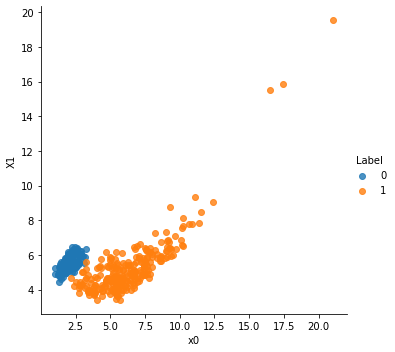

In [91]:
plt.figure(figsize=(15,12))
sns.lmplot(data=xdf_kmeans, x='x0',y='X1',hue='Label',fit_reg=False);

In [92]:
data={'Label_default':y, 'Label_ward':label_ward, 'Label_single':label_single, 'Label_complete':label_complete,'Label_gmm':pred ,'Label_gmm_5':label_gmm, 'Label_kmeans':label_kmeans}
labels= pd.DataFrame(data)
labels

Label_default  Label_ward  Label_single  Label_complete  Label_gmm  \
0                1           0             0               1          0   
1                1           0             0               1          0   
2                1           0             0               0          1   
3                1           0             0               1          1   
4                1           0             0               1          0   
..             ...         ...           ...             ...        ...   
395              0           1             0               1          0   
396              0           1             0               1          0   
397              0           1             0               1          0   
398              0           1             0               1          0   
399              0           1             0               1          0   

     Label_gmm_5  Label_kmeans  
0              4             0  
1              4             0  
2              0             1  
3              3             1  
4              4             1  
..           ...           ...  
395            2             0  
396            2             0  
397            2             0  
398            2             0  
399            2             0  

[400 rows x 7 columns]

# 6. Confusion Matrix
## 6. a. Hierarchical Clustering 
### a. i) Ward Linkage

In [93]:
from sklearn.metrics import confusion_matrix

conf_ward= confusion_matrix(labels['Label_default'], labels['Label_ward'])
conf_ward

array([[  2, 148],
       [249,   1]])

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. 

Precision

precision = (TP) / (TP+FP)

TP is the number of true positives, and FP is the number of false positives. 

A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. 
 
Recall

recall = (TP) / (TP+FN)

Precision can be seen as a measure of quality, and recall as a measure of quantity

In [94]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
prec_ward= precision_score(labels['Label_default'], labels['Label_ward'])
rec_ward= recall_score(labels['Label_default'], labels['Label_ward'])
prec_ward, rec_ward

(0.006711409395973154, 0.004)

The F1 score is the harmonic mean of precision and recall 

In [95]:
from sklearn.metrics import f1_score
f1_ward= f1_score(labels['Label_default'], labels['Label_ward'])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_ward= accuracy_score(labels['Label_default'], labels['Label_ward'])
accuracy_ward

0.0075

### a. ii) Complete Linkage

In [97]:
conf_complete= confusion_matrix(labels['Label_default'], labels['Label_complete'])
conf_complete

array([[  0, 150],
       [ 31, 219]])

In [98]:
# Finding precision and recall
prec_complete= precision_score(labels['Label_default'], labels['Label_complete'])
rec_complete= recall_score(labels['Label_default'], labels['Label_complete'])
prec_complete, rec_complete

(0.5934959349593496, 0.876)

In [99]:
accuracy_complete= accuracy_score(labels['Label_default'], labels['Label_complete'])
accuracy_complete

0.5475

### a. iii) Single Linkage

In [100]:
conf_single= confusion_matrix(labels['Label_default'], labels['Label_single'])
conf_single

array([[150,   0],
       [249,   1]])

In [101]:
# Finding precision and recall
prec_single= precision_score(labels['Label_default'], labels['Label_single'])
rec_single= recall_score(labels['Label_default'], labels['Label_single'])
prec_single, rec_single

(1.0, 0.004)

In [102]:
accuracy_single= accuracy_score(labels['Label_default'], labels['Label_single'])
accuracy_single

0.3775

## b. GMM

In [103]:
conf_gmm= confusion_matrix(labels['Label_default'], labels['Label_gmm'])
conf_gmm

array([[150,   0],
       [106, 144]])

In [104]:
# Finding precision and recall
prec_gmm= precision_score(labels['Label_default'], labels['Label_gmm'])
rec_gmm= recall_score(labels['Label_default'], labels['Label_gmm'])
prec_gmm, rec_gmm

(1.0, 0.576)

In [105]:
accuracy_gmm= accuracy_score(labels['Label_default'], labels['Label_gmm'])
accuracy_gmm

0.735

## c. KMeans

In [106]:
conf_kmeans= confusion_matrix(labels['Label_default'], labels['Label_kmeans'])
conf_kmeans

array([[150,   0],
       [ 54, 196]])

In [107]:
# Finding precision and recall
prec_kmeans= precision_score(labels['Label_default'], labels['Label_kmeans'])
rec_kmeans= recall_score(labels['Label_default'], labels['Label_kmeans'])
prec_kmeans, rec_kmeans

(1.0, 0.784)

In [108]:
accuracy_kmeans= accuracy_score(labels['Label_default'], labels['Label_kmeans'])
accuracy_kmeans

0.865

In [109]:
data_label=['Ward', 'Complete', 'Single', 'GMM', 'KMeans']

data_ward={'Precision':prec_ward, 'Recall':rec_ward, 'Accuracy':accuracy_ward}
data_complete={'Precision':prec_complete, 'Recall':rec_complete, 'Accuracy':accuracy_complete}
data_single={'Precision':prec_single, 'Recall':rec_single, 'Accuracy':accuracy_single}
data_gmm={'Precision':prec_gmm, 'Recall':rec_gmm, 'Accuracy':accuracy_gmm}
data_kmeans={'Precision':prec_kmeans, 'Recall':rec_kmeans, 'Accuracy':accuracy_kmeans}

data_list= [data_ward, data_complete, data_single, data_gmm, data_kmeans]

scores= pd.DataFrame(data_list, index= data_label)
scores

Precision  Recall  Accuracy
Ward       0.006711   0.004    0.0075
Complete   0.593496   0.876    0.5475
Single     1.000000   0.004    0.3775
GMM        1.000000   0.576    0.7350
KMeans     1.000000   0.784    0.8650

## Best Model K- Means with highest accuracy of 86.5%
## 7. Business Inference

In [110]:
df2= df.drop(['id'], axis=1)
df2['cluster'] = clusters.reshape(-1,1)
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df2['cen_x'] = df2['cluster'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df2['cen_y'] = df2['cluster'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#81DF20', '#DF2020']
df2['c'] = df2['cluster'].map({0:colors[0], 1:colors[1]})

In [111]:
df2.shape

(400, 29)

In [112]:
df2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification', 'cluster', 'cen_x', 'cen_y',
       'c'],
      dtype='object')

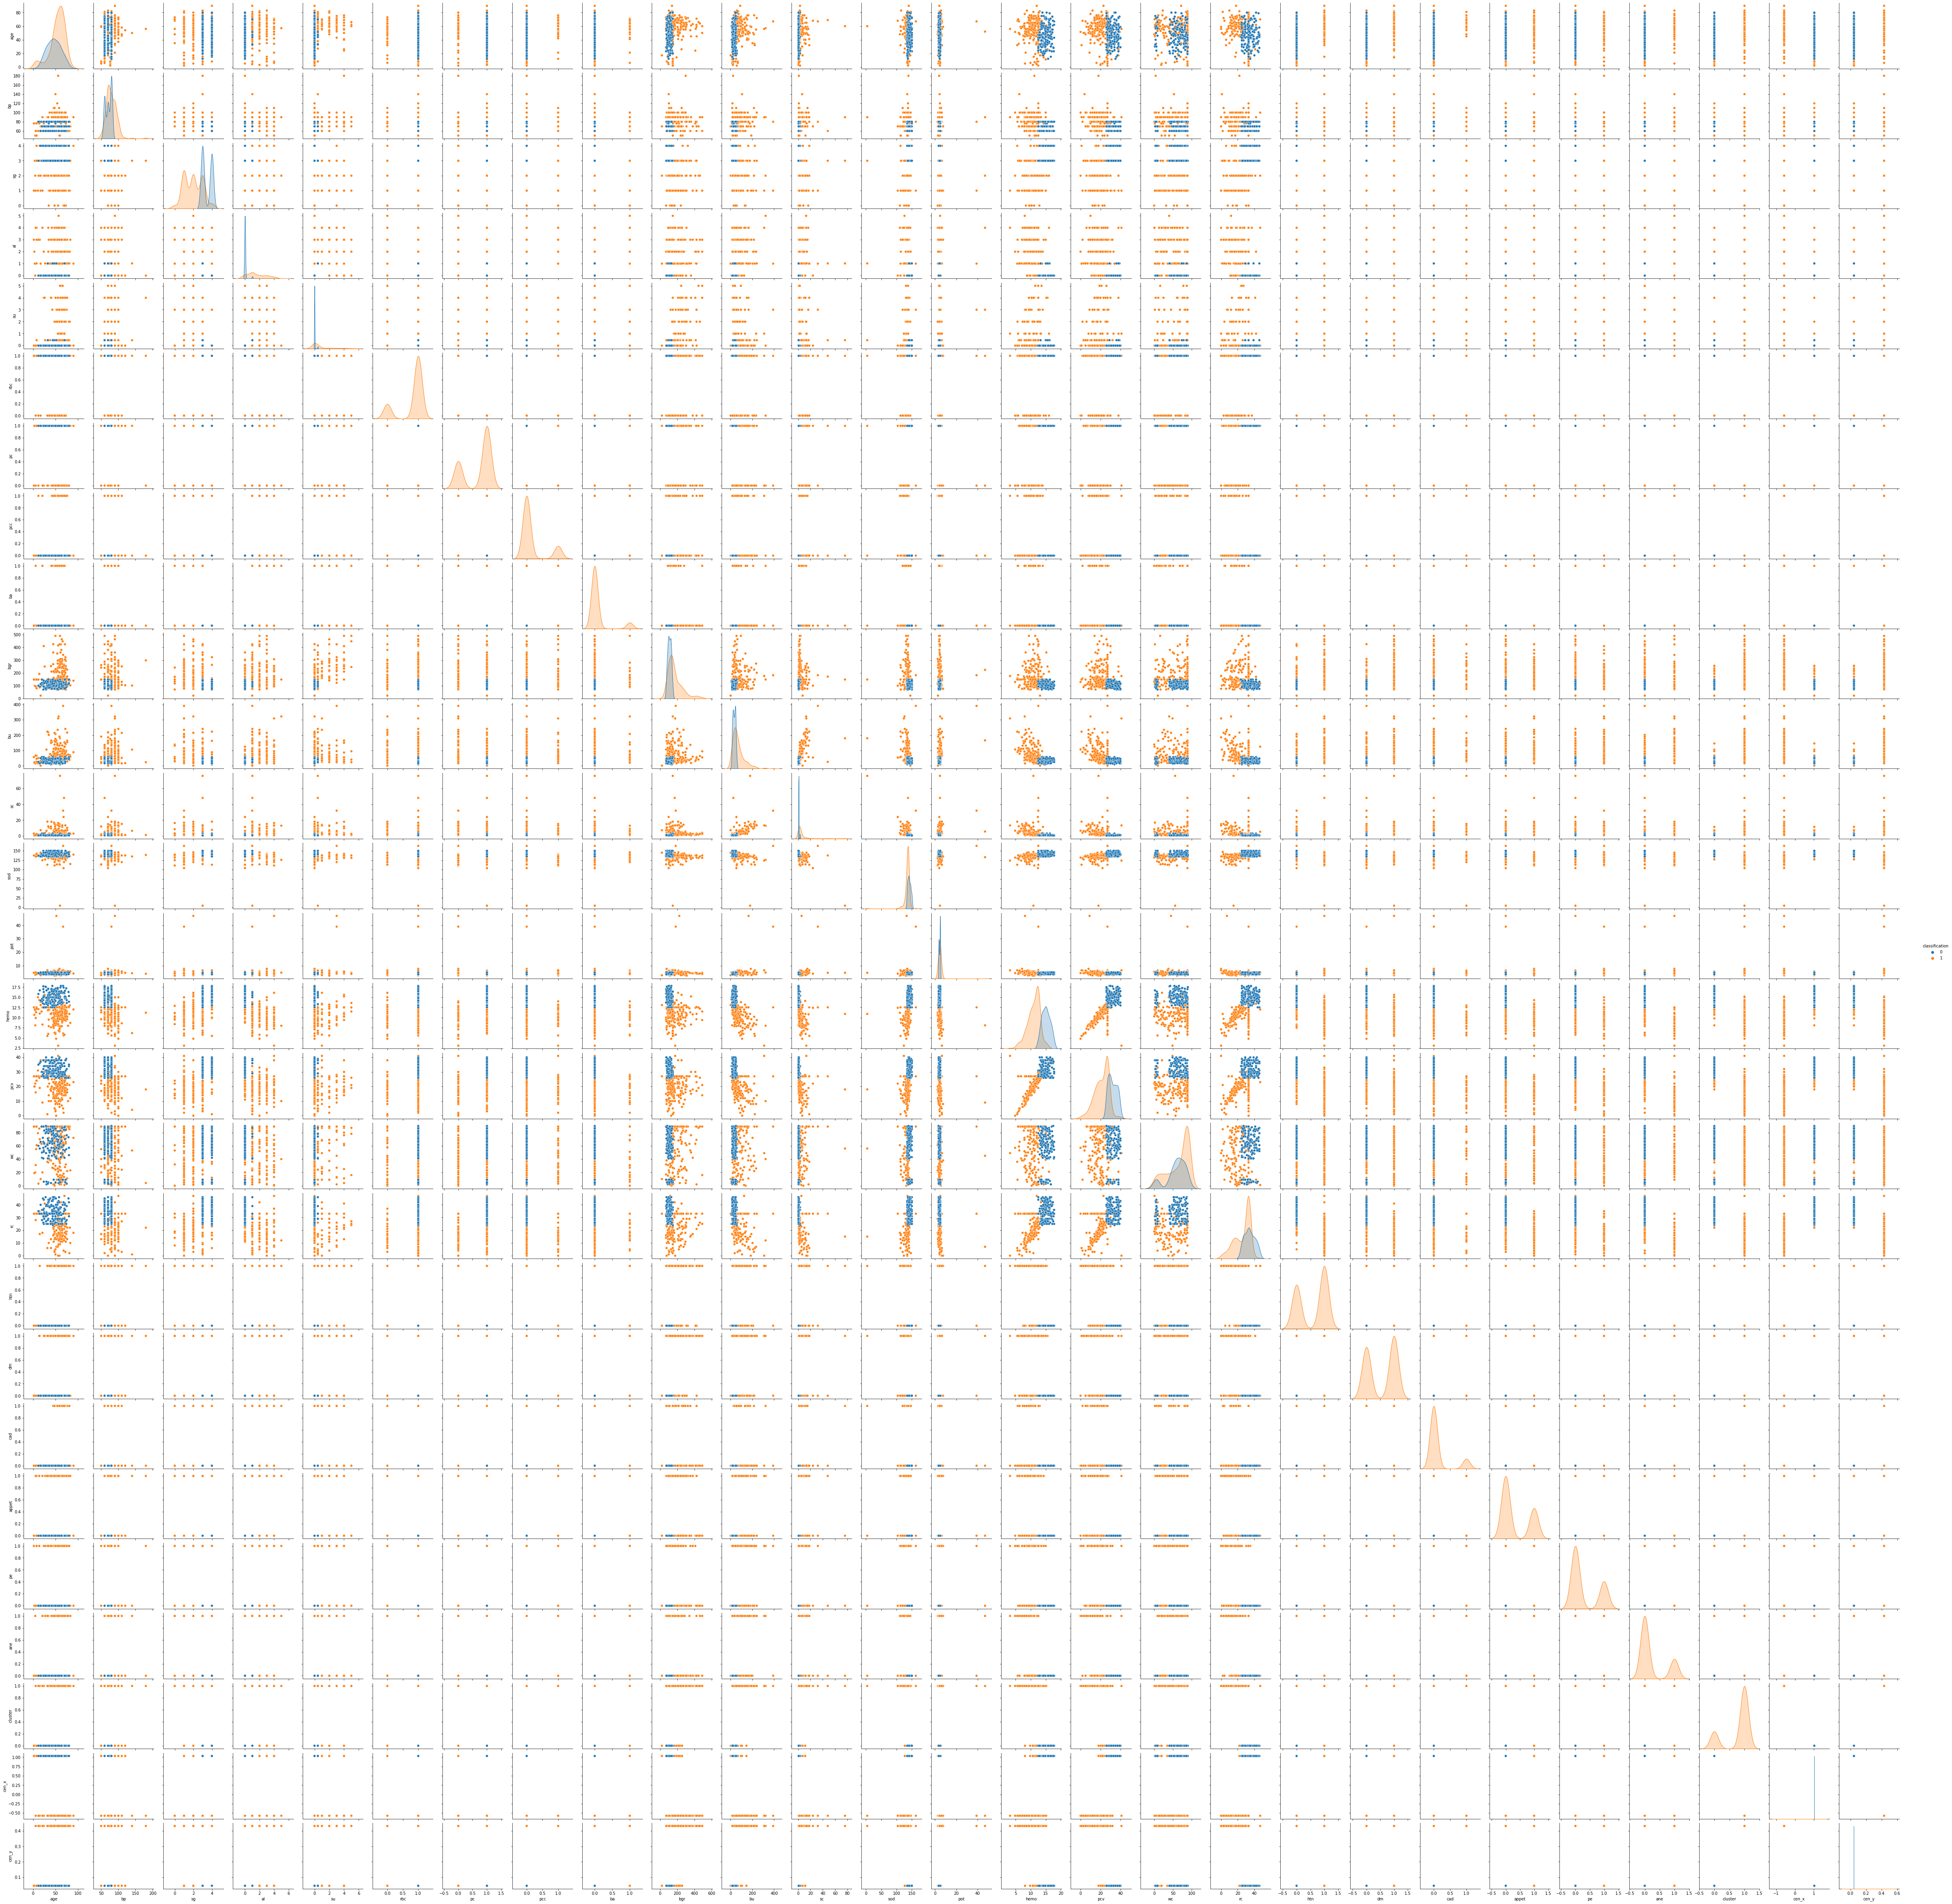

In [113]:
#plt.scatter(df2.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
sns.pairplot(df2, hue='classification');

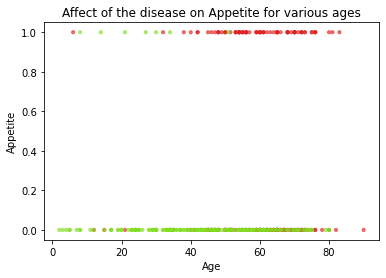

In [116]:
plt.scatter(df2['age'], df['appet'], c=df2['c'], alpha = 0.6, s=10)
plt.xlabel('Age')
plt.ylabel('Appetite')
plt.title('Affect of the disease on Appetite for various ages'); # color in red means 1(have disease); green means 0 (no disease)

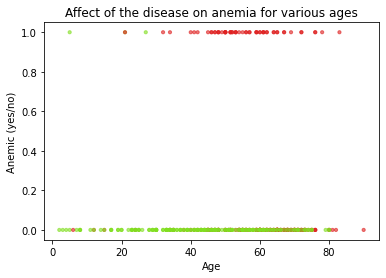

In [117]:
plt.scatter(df2['age'], df['ane'], c=df2['c'], alpha = 0.6, s=10)
plt.xlabel('Age')
plt.ylabel('Anemic (yes/no)')
plt.title('Affect of the disease on anemia for various ages');

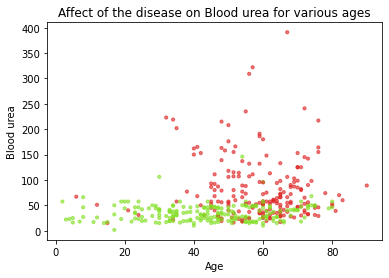

In [118]:
plt.scatter(df2['age'], df['bu'], c=df2['c'], alpha = 0.6, s=10)
plt.xlabel('Age')
plt.ylabel('Blood urea')
plt.title('Affect of the disease on Blood urea for various ages');

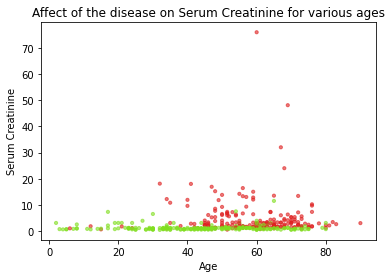

In [119]:
plt.scatter(df2['age'], df['sc'], c=df2['c'], alpha = 0.6, s=10)
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.title('Affect of the disease on Serum Creatinine for various ages');

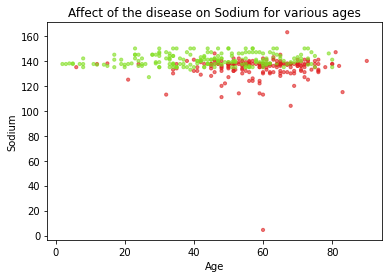

In [120]:
plt.scatter(df2['age'], df['sod'], c=df2['c'], alpha = 0.6, s=10)
plt.xlabel('Age');
plt.ylabel('Sodium')
plt.title('Affect of the disease on Sodium for various ages');

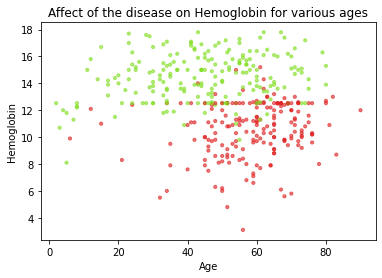

In [121]:
plt.scatter(df2['age'], df['hemo'], c=df2['c'], alpha = 0.6, s=10)
plt.xlabel('Age')
plt.ylabel('Hemoglobin');
plt.title('Affect of the disease on Hemoglobin for various ages');

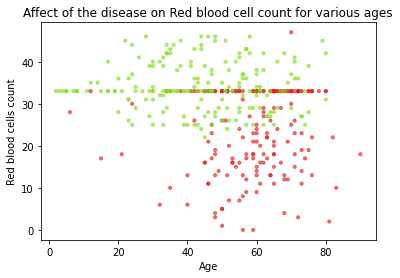

In [122]:
plt.scatter(df2['age'], df['rc'], c=df2['c'], alpha = 0.6, s=10)
plt.xlabel('Age')
plt.ylabel('Red blood cells count')
plt.title('Affect of the disease on Red blood cell count for various ages');

## Business Inference: People age above 40 have a higher probability of having chronic kidney disease